In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from lightgbm import LGBMClassifier
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
train = pd.read_csv("train.csv").drop("ID", axis = 1)
test = pd.read_csv("test.csv").drop("ID", axis = 1)
train.head()

,calorie,water,carbohydrate,fiber,sugar,protein,fat,sfat,cholesterol,sodium,...,iron,folat,pantotenik,fosfor,magnesium,cinko,copper,selenium,manganese,Class
0,717,17.94,0.06,0,0.06,0.85,81.11,51.368,215,11.00,...,0.02,3,0.11,24,2,0.09,16,1,4,Hayvansal
1,116,76.78,0,0,0,19.41,3.71,94.900.000,89,114.00,...,0.76,4,1.1,174,20,02.05,66,21.8,14,Hayvansal
2,75,79.53,17.99,4.9,4.8,1.2,0.3,0.05,0,10.00,...,0.59,67,60.000.000,71,29,0.59,0.12,1.8,56.000.000,Bitkisel
3,132.46,73.13,12.46,1.59,1.59,6.37,6.57,2.23,22.57,320.48,...,0.98,15.53,0.39,79.5,21.38,1.36,0.15,5.2,0.24,Mix
4,103.29,79.04,04.01,01.07,2.38,11.47,4.53,0.77,28.62,316.43,...,0.71,15.6,0.4,78.47,16.49,0.46,0.05,8.5,0.1,Hayvansal


In [3]:
test.isnull().sum()

calorie         0
water           0
carbohydrate    0
fiber           0
sugar           0
protein         0
fat             0
sfat            0
cholesterol     0
sodium          0
potassium       0
calcium         0
vit_A           0
vit_C           0
vit_D           0
vit_E           0
vit_K           0
vit_B6          0
vit_B12         0
thiamin         0
riboflavin      0
niacin          0
iron            0
folat           0
pantotenik      0
fosfor          0
magnesium       0
cinko           0
copper          0
selenium        0
manganese       0
dtype: int64

In [4]:
label_encoder = preprocessing.LabelEncoder() 

train["Class"] = label_encoder.fit_transform(train["Class"]) 
train["Class"].unique()

array([1, 0, 2])

In [5]:
columns = train.columns[:-1]
for col in columns:
    train[col] = pd.to_numeric(train[col], errors = "coerce")
    
columns = test.columns
for col in columns:
    test[col] = pd.to_numeric(test[col], errors = "coerce")

In [6]:
columns = train.columns[:-1]
for col in columns:
    train[col] = train[col].fillna(train[col].mean())
    
columns = test.columns
for col in columns:
    test[col] = test[col].fillna(test[col].mean())

In [7]:
X = train.drop("Class", axis = 1)
y = train["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [8]:
model = LGBMClassifier().fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.77

In [9]:
params = {"learning_rate" : [0.001, 0.01, 0.1],
          "n_estimators" : [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
          "max_depth" : [2, 3, 4, 5, 6, 7, 8, 9, 10]}

model = LGBMClassifier()
model_cv = GridSearchCV(model, params, cv = 10, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 10 folds for each of 270 candidates, totalling 2700 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 1961 tasks      | elapsed: 12.6min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed: 15.9min
[Parallel(n_jobs=-1)]: Done 2700 out of 2700 | elapsed: 16.8min finished


[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves


In [10]:
model_cv.best_params_

{'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 300}

In [11]:
model_tuned = LGBMClassifier(learning_rate = 0.1, max_depth = 9, n_estimators = 300).fit(X_train, y_train)
y_pred = model_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.768

Text(0, 0.5, 'Değişkenler')

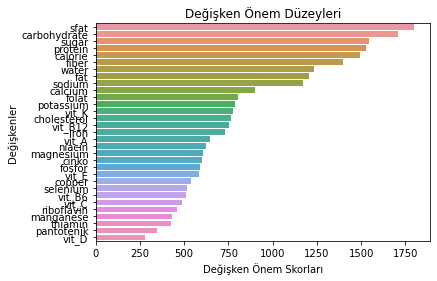

In [12]:
feature_imp = pd.Series(model_tuned.feature_importances_, index = X_train.columns).sort_values(ascending = False)
sns.barplot(x = feature_imp, y = feature_imp.index)
plt.title("Değişken Önem Düzeyleri")
plt.xlabel("Değişken Önem Skorları")
plt.ylabel("Değişkenler")